In [235]:
import pandas as pd 
import numpy as np
from numpy.random import random_integers as rnd
from random import randrange

# Create fitness function: 

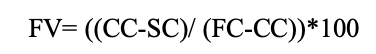

In [236]:
from IPython.display import Image
img = '/Users/lorenzofamiglini/Desktop/fitnessf.png'
Image(filename=img)

We need to maximaze the ratio: The larger the difference to the numerator, the smaller the distance to the point of arrival.

In [237]:
def fitness_function(cc, sc, fc): 
    from scipy.spatial import distance
    num = distance.euclidean(cc, sc)
    den = distance.euclidean(fc, cc) + 1
    ratio = (num/den)*100
    return ratio

In [238]:
#fitness_function((0,1),(0,0),(0,2))

In [239]:
def create_mz(width = 3, height = 6):
    mz = maze(width, height)
    for i in range(100):
        x = randrange(mz.shape[1]-1) #start
        y = randrange(mz.shape[1]-1) #end
        if (x!=0 & x!=(randrange(mz.shape[1]-1)) & y!=0 & y!=(randrange(mz.shape[1]-1)) &(mz[1][y]!=1) & (mz[mz.shape[0]-2][x]!=1)):
            mz[mz.shape[0]-1][x] = 2
            mz[0][y] = 3
            break
    start = (mz.shape[0]-1,x)
    end = (0, y)
    return(mz, start, end)

# Create Maze

In [240]:
def maze(width=80, height=40, complexity=.75, density =.75):
    # Only odd shapes
    shape = ((height//2)*2+1, (width//2)*2+1)
    # Adjust complexity and density relative to maze size
    complexity = int(complexity*(5*(shape[0]+shape[1])))
    density    = int(density*(shape[0]//2*shape[1]//2))
    # Build actual maze
    Z = np.zeros(shape)
    # Fill borders
    Z[0,:] = Z[-1,:] = 1
    Z[:,0] = Z[:,-1] = 1
    # Make isles
    for i in range(density):
        x, y = rnd(0,shape[1]//2)*2, rnd(0,shape[0]//2)*2
        Z[y,x] = 1
        for j in range(complexity):
            neighbours = []
            if x > 1:           neighbours.append( (y,x-2) )
            if x < shape[1]-2:  neighbours.append( (y,x+2) )
            if y > 1:           neighbours.append( (y-2,x) )
            if y < shape[0]-2:  neighbours.append( (y+2,x) )
            if len(neighbours):
                y_,x_ = neighbours[rnd(0,len(neighbours)-1)]
                if Z[y_,x_] == 0:
                    Z[y_,x_] = 1
                    Z[y_+(y-y_)//2, x_+(x-x_)//2] = 1
                    x, y = x_, y_
    return Z

In [241]:
mz, start, end = create_mz(width=5,height=5)

/Library/Frameworks/Python.framework/Versions/3.7/lib/python3.7/site-packages/ipykernel_launcher.py:14: DeprecationWarning: This function is deprecated. Please call randint(0, 2 + 1) instead
  
/Library/Frameworks/Python.framework/Versions/3.7/lib/python3.7/site-packages/ipykernel_launcher.py:23: DeprecationWarning: This function is deprecated. Please call randint(0, 1 + 1) instead


# Random starting population with N-parents

In [242]:
#mz.shape[0]

5

In [243]:
def random_population(mz, num_parents):
    parent = []
    parent2 = []
    direction = ["n","s","e","w"] #North, South, East, West
    for i in range(num_parents):
        if (mz.shape[0] <= mz.shape[1]):
            parent.append(np.random.choice(direction, int(mz.shape[0]/2)).tolist())
        else: 
            parent.append(np.random.choice(direction, int(mz.shape[1]/2)).tolist())
    return parent

In [244]:
prova = random_population(mz,min(mz.shape))

In [245]:
prova

[['e', 's'], ['n', 'e'], ['s', 's'], ['e', 'n'], ['w', 's']]

In [246]:
def random_population2(mz, num_parents):
    parent = []
    parent2 = []
    direction = ["n","s","e","w"] #North, South, East, West
    for i in range(num_parents):
        if (mz.shape[0] <= mz.shape[1]):
            parent.append(np.random.choice(direction,mz.shape[0]).tolist())
        else: 
            parent.append(np.random.choice(direction, mz.shape[1]).tolist())
    return parent

# Moving Funtion

In [247]:
def moving(mz, seq, current_pos):
    for i in seq:
        if ((i == 'n') & (current_pos[0]!=0)):
            if((mz[current_pos[0]-1, current_pos[1]]!=1)):
                current_pos = (current_pos[0]-1, current_pos[1])
        if ((i == 's') & (current_pos[0]!=(mz.shape[0]-1))):
            if((mz[current_pos[0] + 1, current_pos[1]]!=1)):
                current_pos = (current_pos[0]+1, current_pos[1])
        if ((i == 'w') & (mz[(current_pos[0], current_pos[1]-1)]!=1)):
            current_pos = (current_pos[0], current_pos[1]-1)
        if ((i == 'e') & (mz[(current_pos[0], current_pos[1]+1)]!=1)):
            current_pos = (current_pos[0], current_pos[1]+1)
    return(current_pos)

In [248]:
#moving(mz,['s', 'w', 'e', 's', 'w'], (0,2))

# Score Function: 
We need to compute the total sum of fitness for the denominator and use the i-th fitness value for the numerator. In this way, we are going to attribute more weight to higher fitness value and less weight to the lowest value. The range score is between 0 and 1.

In [249]:
def score_function(random_parents,start, end,mz):
    diz = {}
    diz2 = {}
    diz3 = {}
    conta = 0
    d = {}
    for i in random_parents:
        diz["seq"] = i 
        diz["cc"]= moving(mz,seq = i,current_pos = start)
        diz["fitness"] = fitness_function(cc = diz["cc"], sc = start, fc = end).round(3)
        diz2["sol{0}".format(conta)] = diz
        diz = {}
        conta = conta + 1 
    tot_sum = 0
    for i in range(len(diz2)):
        d = diz2["sol{0}".format(i)]
        tot_sum = tot_sum + d['fitness']
    #tot_sum = 0
    for i in range(len(diz2)):
        d = diz2["sol{0}".format(i)] 
        d['prob'] = d['fitness']/tot_sum
    return diz2

In [250]:
mz, start, end = create_mz(width=5,height=5)

/Library/Frameworks/Python.framework/Versions/3.7/lib/python3.7/site-packages/ipykernel_launcher.py:14: DeprecationWarning: This function is deprecated. Please call randint(0, 2 + 1) instead
  
/Library/Frameworks/Python.framework/Versions/3.7/lib/python3.7/site-packages/ipykernel_launcher.py:23: DeprecationWarning: This function is deprecated. Please call randint(0, 2 + 1) instead
/Library/Frameworks/Python.framework/Versions/3.7/lib/python3.7/site-packages/ipykernel_launcher.py:23: DeprecationWarning: This function is deprecated. Please call randint(0, 3 + 1) instead


In [251]:
prova = random_population(mz,min(mz.shape))

In [252]:
diz2 = score_function(random_parents = prova, start = start, end = end, mz = mz)

/Library/Frameworks/Python.framework/Versions/3.7/lib/python3.7/site-packages/ipykernel_launcher.py:21: RuntimeWarning: invalid value encountered in double_scalars


In [253]:
#diz2

{'sol0': {'seq': ['s', 'e'], 'cc': (4, 1), 'fitness': 0.0, 'prob': nan},
 'sol1': {'seq': ['w', 's'], 'cc': (4, 1), 'fitness': 0.0, 'prob': nan},
 'sol2': {'seq': ['e', 'e'], 'cc': (4, 1), 'fitness': 0.0, 'prob': nan},
 'sol3': {'seq': ['w', 's'], 'cc': (4, 1), 'fitness': 0.0, 'prob': nan},
 'sol4': {'seq': ['w', 's'], 'cc': (4, 1), 'fitness': 0.0, 'prob': nan}}

# Choice function for selecting the best parents

In [254]:
def best_sol(diz):
    diz = copy.deepcopy(diz)
    m = 0
    sol = "sol{0}".format(1)
    for i in range(len(diz)):
        value = diz["sol{0}".format(i)]['fitness']
        if(value>=m):
            m = value
            sol = "sol{0}".format(i)
    return(sol, m)

In [255]:
import ipdb
def select_function(diz):
    l = []
    keys = []
    for i in range(len(diz)):
        d = diz["sol{0}".format(i)] 
        l.append(d['prob'])
    for key in diz.keys():
        keys.append(key)  
    sample = np.random.choice(keys, len(diz) ,replace=True, p=l)
    diz_out = {}
    for i in range(len(sample) + 1):
        if(i != len(sample)):
            diz_out["sol{0}".format(i)] = diz[sample[i]]
        else:
            sol, m = best_sol(diz)
            diz_out["sol{0}".format(i)] = diz[sol]
    return(diz_out)

In [256]:
app = select_function(diz2)

/Library/Frameworks/Python.framework/Versions/3.7/lib/python3.7/site-packages/ipykernel_launcher.py:10: RuntimeWarning: invalid value encountered in less
  # Remove the CWD from sys.path while we load stuff.


In [257]:
#app

{'sol0': {'seq': ['s', 'e'], 'cc': (4, 1), 'fitness': 0.0, 'prob': nan},
 'sol1': {'seq': ['s', 'e'], 'cc': (4, 1), 'fitness': 0.0, 'prob': nan},
 'sol2': {'seq': ['s', 'e'], 'cc': (4, 1), 'fitness': 0.0, 'prob': nan},
 'sol3': {'seq': ['s', 'e'], 'cc': (4, 1), 'fitness': 0.0, 'prob': nan},
 'sol4': {'seq': ['s', 'e'], 'cc': (4, 1), 'fitness': 0.0, 'prob': nan},
 'sol5': {'seq': ['w', 's'], 'cc': (4, 1), 'fitness': 0.0, 'prob': nan}}

# Crossover

In [260]:
def crossover(diz, broke, best_to_keep, mz):
    import copy
    diz = copy.deepcopy(diz)
    ind = 0
    n = 0
    diz2 = {}
    diz_out = {}
    conta=0
    diz_app = {}
    fit_values = {}
    bests = []
    diz_fin = {}
    for i in range(int(len(diz)/2)):
        d = {}
        a = diz["sol{0}".format(ind)]['seq']
        b = diz["sol{0}".format(ind+1)]['seq']
        broke = int(min(len(a), len(b))/2)
        l1 = []
        l2 = []
        for i in range(broke):
            l1.append(a[i])
        for i in range(len(b)-broke):
            l1.append(b[broke+i])
        for i in range(broke):
            l2.append(b[i])
        for i in range(len(a)-broke):
            l2.append(a[broke+i])
        d['seq'] = l1
        diz_out["sol{0}".format(conta)] = l1
        fit_values["sol{0}".format(conta)] = diz["sol{0}".format(conta)]['fitness']
        conta = conta + 1
        fit_values["sol{0}".format(conta)] = diz["sol{0}".format(conta)]['fitness']
        d['seq'] = l2
        diz_out["sol{0}".format(conta)] = l2
        conta = conta + 1 
        ind = ind + 2
    fit_values = {k: v for k, v in sorted(fit_values.items(), key=lambda x: x[1])} #ordino in modo crescente i valori nella funzione dei genitori
    c = 0 #conta
    for i in fit_values:
        if (c in range(best_to_keep)):
            bests.append(i)
        c = c + 1
    lun=len(diz_out)
    p = np.random.uniform(0,1,1) #add a direction randomly
    for i in range(len(bests)): 
        if p <= 0.2:
            c = np.random.choice(["n","s","e","w"], 1)
            diz[bests[i]]["seq"].extend(''.join(c))
            diz_app = {}
            diz_app["seq"]=diz[bests[i]]['seq']
            diz_fin["sol{0}".format(i)] = diz_app
        else:
            diz_app = {}
            diz_app["seq"]=diz[bests[i]]['seq']
            diz_fin["sol{0}".format(i)] = diz_app
    for i in range(len(diz_out)):
        d_seq = {}
        p2 = np.random.uniform(0,1,1)
        if p2 >= 0.5:
            c = np.random.choice(["n","s","e","w"], 1)
            diz_out["sol{0}".format(i)].extend(''.join(c))
        #else:
            #lr = int(0.90*(len(diz_out["sol{0}".format(i)])/2)) #learning rate
            #if (len(diz_out["sol{0}".format(i)]) > lr):
                #diz_out["sol{0}".format(i)].pop(-lr)
    x = len(diz_fin)
    for i in range(len(diz_out)):
        diz_app2 = {}
        diz_app2["seq"] = diz_out["sol{0}".format(i)]
        diz_fin["sol{0}".format(x+i)] = diz_app2
    return diz_fin

In [261]:
# %%time
#prova = crossover(diz= app, broke = 3,best_to_keep=2,mz=mz)

In [262]:
def crossover2(diz, broke, best_to_keep, mz):
    import copy
    diz = copy.deepcopy(diz)
    ind = 0
    n = 0
    diz2 = {}
    diz_out = {}
    conta=0
    diz_app = {}
    fit_values = {}
    bests = []
    diz_fin = {}
    a = {}
    b = {}
    for i in range(int(len(diz)/2)):
        d = {}
        a = diz["sol{0}".format(ind)]['seq']
        b = diz["sol{0}".format(ind+1)]['seq']
        broke = int(min(len(a), len(b))/2)
        l1 = []
        l2 = []
        for i in range(broke):
            l1.append(a[i])
        for i in range(len(b)-broke):
            l1.append(b[broke+i])
        for i in range(broke):
            l2.append(b[i])
        for i in range(len(a)-broke):
            l2.append(a[broke+i])
        d['seq'] = l1
        diz_out["sol{0}".format(conta)] = l1
        fit_values["sol{0}".format(conta)] = diz["sol{0}".format(conta)]['fitness']
        conta = conta + 1
        fit_values["sol{0}".format(conta)] = diz["sol{0}".format(conta)]['fitness']
        d['seq'] = l2
        diz_out["sol{0}".format(conta)] = l2
        conta = conta + 1 
        ind = ind + 2
    fit_values = {k: v for k, v in sorted(fit_values.items(), key=lambda x: x[1])} #ordino in modo crescente i valori nella funzione dei genitori
    c = 0 #conta
    for i in fit_values:
        if (c in range(best_to_keep)):
            bests.append(i)
        c = c + 1
    lun=len(diz_out)
    p = np.random.uniform(0,1,1) #add a direction randomly
    for i in range(len(bests)): 
            diz_app = {}
            diz_app["seq"]=diz[bests[i]]['seq']
            diz_fin["sol{0}".format(i)] = diz_app
    for i in range(len(diz_out)):
        c = np.random.choice(["n","s","e","w"], 1)
        diz_out["sol{0}".format(i)].extend(''.join(c))

    x = len(diz_fin)
    for i in range(len(diz_out)):
        diz_app2 = {}
        diz_app2["seq"] = diz_out["sol{0}".format(i)]
        diz_fin["sol{0}".format(x+i)] = diz_app2
    return diz_fin

In [263]:
#import copy
#prova2 = copy.deepcopy(prova)

# Add a stronger gene to the crossover sequence

In [264]:
import itertools
import copy
def add_gene(diz2, start, end, mz, strong):
    #import ipdb
    diz = copy.deepcopy(diz2)
    conta = 0
    conta2 = 0
    listaq = []
    diz3 = {}
    diz4 = {}
    d = {}
    lista3 = []
    d2 = {}
    lista = []
    for i in range(len(diz)-1):
        d = diz["sol{0}".format(i)]
        c = np.random.choice(["n","s","e","w"], 1)
        d["seq"].append(''.join(c))
        conta = conta + 1
    #diz2 = copy.deepcopy(diz)
    for i in range(len(diz)):
        d2 = diz["sol{0}".format(i)]
        current_pos = moving(mz,seq =d2["seq"],current_pos = start)
        d2["current_poss"] = current_pos
        f = fitness_function(current_pos,start,end).round(3)
        d2["fitness"] = f
    sor = dict(sorted(diz.items(), key=lambda item: item[1]['fitness'], reverse = True)[:strong])
    for i,j in sor.items():
        for q in j["seq"]:
            #print(j["seq"])
            #current_pos = moving(mz,seq = q,current_pos = start)
            #if (start != current_pos):
                #lista3.extend(q)
            #start = current_pos
        #listaq.append(lista3)
            diz3["seq"] = j["seq"]
            diz4["sol{0}".format(conta2)] = diz3
            lista3 = []
            diz3 = {}
            conta2 = conta2 + 1
    return diz4

In [265]:
#a = add_gene(prova, start = start, mz = mz, end = end, strong = 2)

# Function for union two functions above

In [267]:
def union_gene(diz, diz2):
    lista2 = []
    app2 = {}
    conta = 0
    app = {}
    for i,j in diz.items():
        lista2.append(j["seq"])
    for i,j in diz2.items():
        lista2.append(j["seq"])
    for i in lista2:
        app["seq"] = i 
        app2["sol{0}".format(conta)] = app
        conta = conta + 1
        app = {}
    return app2

In [268]:
#dizion = union_gene(prova,a)

# Mutation Function


In [270]:
def mutate(l, pr = 0.1):
    for i in range(len(l)):
        if(int(np.random.choice(2,1, replace=False, p = [1-pr, pr])) == 1):
            rand = np.random.choice(["n","s","e","w"],1, replace=False)[0]
            l[i] = rand
    return(l)

In [271]:
def mutation_fun(diz, pr = 0.1):
    for i in range(len(diz)):
        d = diz["sol{0}".format(i)]
        d['seq'] = mutate(d['seq'], pr)
    return(diz)

# Convergence function

In [272]:
def convergence(mz, diz, start, end):
    lis = []
    conv = []
    lis_out = []
    start_cell = start
    for i,v in diz.items():
        for k in v["seq"]:
            lis.append(k)
            move = moving(mz,seq =k,current_pos = start_cell)
            if (move == end):
                lis_out = lis
                break
            start_cell = move
        lis = []
        start_cell = start
    return (lis_out)

In [273]:
#convergence(mz, mut, start,end)

# GENETIC ALGORITHM:

In [ ]:
#

In [39]:
def GA(genitori, start, end, mz, pr, n_iters, broke, strong):
    conv_coor = []
    fin = []
    diz2 = {}
    diz3 = {}
    for i in range(n_iters):
        diz = score_function(genitori, start, end, mz)
        diz = select_function(diz)
        cross = crossover(diz, broke, best_to_keep = 3, mz = mz)
        #strongest_gen = add_gene(cross, start, end, mz, strong)
        #diz = union_gene(cross, strongest_gen)
        diz3 = mutation_fun(cross, pr)
        genitori = []
        for i,j in diz3.items():
            #print(j["seq"])
            genitori.append(j["seq"])
       # diz3 = {}
    for i in range(len(genitori)):
        diz2["sol {0}".format(i)] = genitori[i]
    return diz2

In [114]:
#conv = convergence(mz, prova, start, end)
#if conv == end:
 #   conv_coor.append(conv)

In [ ]:
mz1, start1, end1 = create_mz(width=20,height=20)

In [ ]:
start1

In [ ]:
end1

In [ ]:
genitori = random_population(mz1, 5)

In [ ]:
genitori

In [ ]:
%%time
prova = GA(genitori = genitori, start = start1,end = end1,mz = mz1, pr = 0.1,broke = 5,n_iters = 120, strong = 2)

# prova

In [274]:
mz1, start1, end1 = create_mz(width=20,height=20)

/Library/Frameworks/Python.framework/Versions/3.7/lib/python3.7/site-packages/ipykernel_launcher.py:14: DeprecationWarning: This function is deprecated. Please call randint(0, 10 + 1) instead
  
/Library/Frameworks/Python.framework/Versions/3.7/lib/python3.7/site-packages/ipykernel_launcher.py:23: DeprecationWarning: This function is deprecated. Please call randint(0, 3 + 1) instead
/Library/Frameworks/Python.framework/Versions/3.7/lib/python3.7/site-packages/ipykernel_launcher.py:23: DeprecationWarning: This function is deprecated. Please call randint(0, 2 + 1) instead
/Library/Frameworks/Python.framework/Versions/3.7/lib/python3.7/site-packages/ipykernel_launcher.py:23: DeprecationWarning: This function is deprecated. Please call randint(0, 1 + 1) instead


In [275]:
genitori = random_population(mz1, 10)

In [276]:
genitori

[['s', 'e', 'n', 'n', 'e', 's', 'e', 'e', 'w', 'n'],
 ['n', 'w', 'w', 's', 'n', 'w', 'n', 's', 'n', 'n'],
 ['n', 's', 'n', 'w', 'e', 'n', 'w', 'n', 'e', 's'],
 ['n', 'w', 's', 's', 's', 'e', 'e', 'n', 's', 'n'],
 ['w', 'e', 'e', 's', 'e', 'n', 'w', 'w', 'n', 'n'],
 ['n', 'n', 'n', 'n', 's', 's', 'n', 'n', 's', 's'],
 ['s', 's', 'n', 'w', 'n', 'e', 'n', 's', 'n', 'n'],
 ['w', 'n', 'e', 's', 'e', 's', 'e', 'n', 's', 's'],
 ['n', 's', 'n', 'w', 'e', 's', 'n', 'n', 'e', 'w'],
 ['n', 'e', 's', 's', 'w', 's', 'w', 'n', 'w', 'n']]

In [277]:
def GA2(genitori, start, end, mz, pr, n_iters, broke, strong):
    conv_coor = []
    fin = []
    diz2 = {}
    diz3 = {}
    genitori2 = []
    for i in range(n_iters):
        diz = score_function(genitori, start, end, mz)
        diz = select_function(diz)
        cross = crossover2(diz, broke, best_to_keep = 3, mz = mz)
        #strongest_gen = add_gene(cross, start, end, mz, strong)
        #diz = union_gene(cross, strongest_gen)
        diz3 = mutation_fun(cross, pr)
        genitori = []
        for i,j in diz3.items():
            #print(j["seq"])
            genitori.append(j["seq"])
    for i in range(len(genitori)):
        diz2["sol {0}".format(i)] = genitori[i]
    return diz2

In [278]:
%%time
prova2 = GA2(genitori = genitori, start = start1,end = end1,mz = mz1, pr = 0.1,broke = 5,n_iters = 80, strong = 2)

CPU times: user 1min 37s, sys: 1.53 s, total: 1min 39s
Wall time: 1min 53s


In [279]:
cw = []
for i,k in prova2.items():
    cw.append(k)

In [280]:
len(cw)

329

In [281]:
score = score_function(cw, start1, end1, mz1)

In [283]:
diz11 = dict(sorted(score.items(), key=lambda item: item[1]['fitness'], reverse = True)[:10])

In [285]:
lis_ck = []
lis_ck2 = []
for i,v in diz11.items():
    lis_ck.append(v["seq"])

# Cleaning crashes with the walls

In [287]:
def clean_walls(lista, end, start):  
    import copy
    np = copy.deepcopy(lista)
    start_cell = start
    new = []
    new2 = []
    move = end
    coor = []
    for i in np:
        mov_start2 = moving(mz1 ,seq =i, current_pos = start_cell)
        if (start_cell != mov_start2):
            new.append(i)
        start_cell = mov_start2
    return new

In [288]:
clean = clean_walls(lis_ck[0], end1, start1)

In [290]:
len(clean)

44

In [291]:
len(lis_ck[0])

89

MovieWriter ffmpeg unavailable. Trying to use pillow instead.


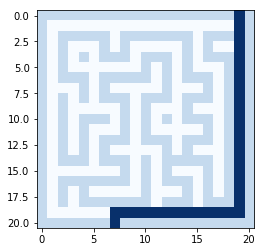

In [294]:
import matplotlib.pyplot as plt
import matplotlib.animation as animation
curre_pos = start1
fig = plt.figure()
figsize = (10,10)
ims = []
cmap = "Blues"#plt.cm.binary
mz2 = mz1.copy()
conta = 0
for i in clean: # cw[::-1][0]
        current_pos2 = moving(mz = mz2,seq =i,current_pos = curre_pos)
        mz2[current_pos2] = 4
        im =  plt.imshow(mz2,interpolation='nearest', cmap=cmap)#, animated=True
        ims.append([im])
    #mz2 = mz1.copy()
        curre_pos = current_pos2
ani = animation.ArtistAnimation(fig, ims, interval=50, blit=True,repeat_delay=1000)

ani.save('prova2.gif', dpi=100)

plt.show()
#plt.pause(1)
#ani = animation.FuncAnimation(fig, curre_pos)
